In [4]:
!pip install tensorflow-addons

import numpy as np
import tensorflow as tf
import scipy as scp
import sklearn as skl
from tqdm import tqdm
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
import tensorflow_addons as tfa
import sklearn.metrics
from PIL import Image
import glob
import os
from tqdm import tqdm
import wave
import pylab
from pathlib import Path
import librosa
from IPython.display import Audio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!git clone https://github.com/soerenab/AudioMNIST.git --depth=1

Cloning into 'AudioMNIST'...
remote: Enumerating objects: 30082, done.
remote: Counting objects: 100% (30082/30082), done.
remote: Compressing objects: 100% (30077/30077), done.
remote: Total 30082 (delta 5), reused 30078 (delta 5), pack-reused 0
Receiving objects: 100% (30082/30082), 944.53 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (30018/30018), done.


In [ ]:
%cd '/content/AudioMNIST'
!python './preprocess_data.py' 

/content/AudioMNIST
processing /content/AudioMNIST/data/01
processing /content/AudioMNIST/data/02
processing /content/AudioMNIST/data/03
processing /content/AudioMNIST/data/04
processing /content/AudioMNIST/data/06
processing /content/AudioMNIST/data/05
processing /content/AudioMNIST/data/07
processing /content/AudioMNIST/data/08
processing /content/AudioMNIST/data/10
processing /content/AudioMNIST/data/09
processing /content/AudioMNIST/data/11
processing /content/AudioMNIST/data/12
processing /content/AudioMNIST/data/13
processing /content/AudioMNIST/data/14
processing /content/AudioMNIST/data/15


In [4]:
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [5]:
def plot_spec(data:np.array,sr:int,title:str, fpath:str) -> None:
  '''
  Function for plotting spectrogram along with amplitude wave graph
  '''
  label = str(fpath).split('/')[-1].split('_')[0]
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].title.set_text(f'{title} / Label: {label}')
  ax[0].specgram(data,Fs=2)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)
  

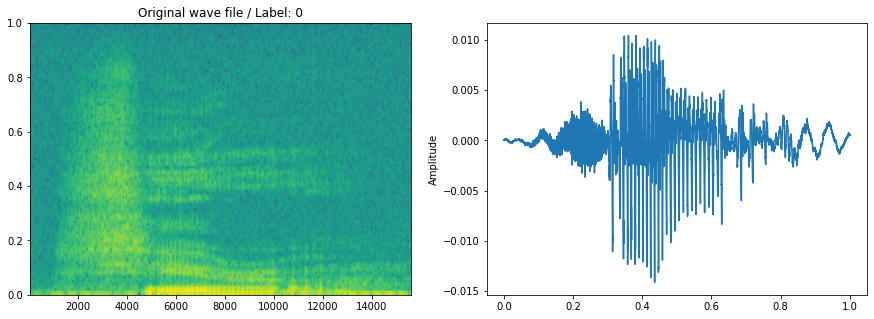

In [66]:
file_path = 'AudioMNIST/data/01/0_01_1.wav'
wav, sr = librosa.load(file_path, sr=None)
plot_spec(wav,sr,'Original wave file',file_path)
Audio(data=wav, rate=sr)

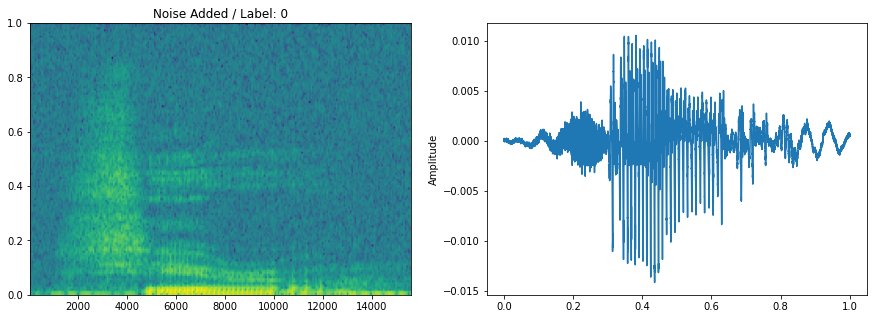

In [68]:
'''
Noise addition using normal distribution with mean = 0 and std =1
Permissible noise factor value = x > 0.004
'''
wav_n = wav + np.random.uniform(high=0.0004) * np.random.normal(0,1,len(wav))
plot_spec(wav_n,sr,'Noise Added',file_path)
Audio(data=wav_n,rate=sr)

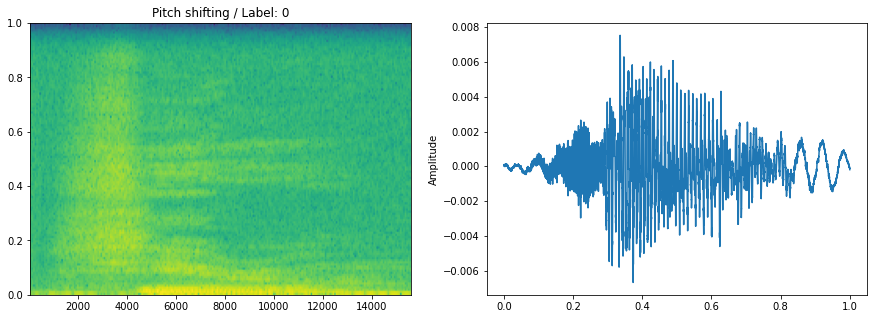

In [69]:
#pitch shifting of wav
'''
Permissible factor values = -3 <= x <= 3
'''
wav_pitch_sf = librosa.effects.pitch_shift(wav,sr,n_steps=np.random.randint(-3, 4))
plot_spec(data=wav_pitch_sf,sr=sr,title=f'Pitch shifting',fpath=file_path)
Audio(wav_pitch_sf,rate=sr)

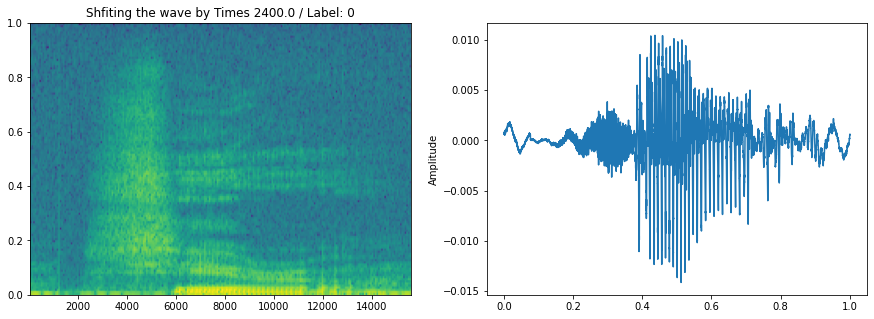

In [55]:
'''
Permissible factor values = sr/20
'''

wav_roll = np.roll(wav,int(sr/20))
plot_spec(data=wav_roll,sr=sr,title=f'Shfiting the wave by Times {sr/20}',fpath=file_path)
Audio(wav_roll,rate=sr)

In [72]:
import soundfile as sf

def audio_augmentation(ori_filename, new_filename):
  wav, sr = librosa.load(ori_filename, sr=None)
  wav_n = wav + np.random.uniform(high=0.0005) * np.random.normal(0,1,len(wav))
  wav_pitch_sf = librosa.effects.pitch_shift(wav_n,sr,n_steps=np.random.randint(-5, 6))
  wav_roll = np.roll(wav_pitch_sf,int(sr/10))
  sf.write(new_filename, wav, sr)



In [71]:
file_path = 'AudioMNIST/data/01/0_01_1.wav'
file_new_path = 'AudioMNIST/data/01/0_01_1_re.wav'

audio_augmentation(file_path, file_new_path)


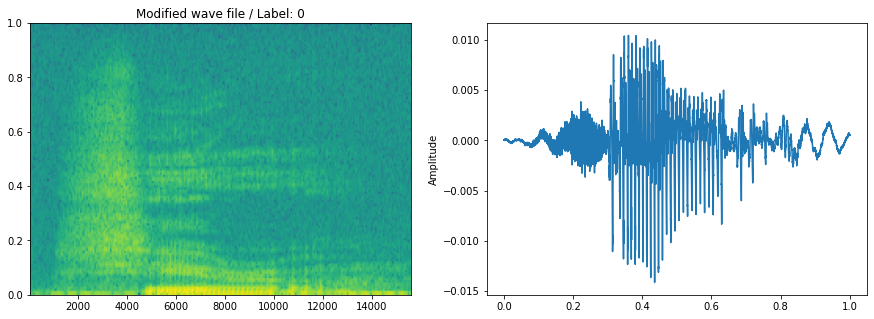

In [73]:
wav, sr = librosa.load(file_new_path, sr=None)
plot_spec(wav,sr,'Modified wave file',file_new_path)
Audio(wav_pitch_sf,rate=sr)

In [73]:
ori_name_list = []
for name in range(1, 10):
  INPUT_DIR = 'AudioMNIST/data/0' + str(name)
  print(name)
  for filename in tqdm(os.listdir(INPUT_DIR)):
    if ("wav" in filename) and (not "re.wav" in filename):
      ori_name_list.append(os.path.join(INPUT_DIR, filename))      


1


100%|██████████| 1000/1000 [00:00<00:00, 454076.43it/s]


2


100%|██████████| 1000/1000 [00:00<00:00, 569105.02it/s]


3


100%|██████████| 1000/1000 [00:00<00:00, 771437.19it/s]


4


100%|██████████| 1000/1000 [00:00<00:00, 623502.90it/s]


5


100%|██████████| 1000/1000 [00:00<00:00, 795581.18it/s]


6


100%|██████████| 500/500 [00:00<00:00, 436542.88it/s]


7


100%|██████████| 500/500 [00:00<00:00, 692357.87it/s]


8


100%|██████████| 500/500 [00:00<00:00, 338687.34it/s]


9


100%|██████████| 500/500 [00:00<00:00, 543162.91it/s]


In [74]:
len(ori_name_list)

4500

In [75]:
  
for ori_wav in tqdm(ori_name_list):
  audio_augmentation(ori_wav, ori_wav.split('.wav')[0] + 're.wav')

100%|██████████| 4500/4500 [03:48<00:00, 19.72it/s]


In [43]:
!rm -rf audio-images/
!rm -rf audio-resized-images/

In [76]:
# generate original spec from audio
if not os.path.exists('audio-images'):
    os.mkdir('audio-images')

for name in range(1, 10):
  INPUT_DIR = 'AudioMNIST/data/0' + str(name)
  print(name)
  for filename in tqdm(os.listdir(INPUT_DIR)):
    if "wav" in filename:
      file_path = os.path.join(INPUT_DIR, filename)
      
      file_stem = Path(file_path).stem
      target_dir = f'class_{file_stem[0]}'
      dist_dir = os.path.join('audio-images', target_dir)
      file_dist_path = os.path.join(dist_dir, file_stem)
      if not os.path.exists(file_dist_path + '.png'):
          if not os.path.exists(dist_dir):
              os.mkdir(dist_dir)
          file_stem = Path(file_path).stem
          sound_info, frame_rate = get_wav_info(file_path)
          pylab.specgram(sound_info, Fs=frame_rate)
          pylab.savefig(f'{file_dist_path}.png')
          pylab.close()

1


100%|██████████| 1000/1000 [00:00<00:00, 42052.38it/s]


2


100%|██████████| 1000/1000 [00:00<00:00, 49087.19it/s]


3


100%|██████████| 1000/1000 [02:10<00:00,  7.64it/s]


4


100%|██████████| 1000/1000 [02:05<00:00,  7.98it/s]


5


100%|██████████| 1000/1000 [02:05<00:00,  7.99it/s]


6


100%|██████████| 1000/1000 [02:07<00:00,  7.83it/s]


7


100%|██████████| 1000/1000 [02:07<00:00,  7.83it/s]


8


100%|██████████| 1000/1000 [02:09<00:00,  7.74it/s]


9


100%|██████████| 1000/1000 [02:06<00:00,  7.93it/s]


In [77]:
# Change image size to 64 * 64
if not os.path.exists('audio-resized-images'):
    os.mkdir('audio-resized-images')

for filename in tqdm(glob.glob(r'audio-images' + '/**/*.png', recursive=True)):
    file_stem = Path(filename).stem
    target_dir = f'class_{file_stem[0]}'
    dist_dir = os.path.join('audio-resized-images', target_dir)
    file_dist_path = os.path.join(dist_dir, file_stem)

    if not os.path.exists(file_dist_path + '.png'):
        if not os.path.exists(dist_dir):
            os.mkdir(dist_dir)
        im = Image.open(filename)
        try:
          imm = im.resize((64, 64))
          imm.save(file_dist_path + '.png')
          im.close
          imm.close
        except:
          print(filename)


100%|██████████| 9000/9000 [01:00<00:00, 148.29it/s]


In [5]:
image_list_ori = []
image_list_re = []

for filename in tqdm(glob.glob(r'audio-resized-images/' + '/**/*.png', recursive=True)):
  if 're.png' in filename:
    # print(filename)
    ori_name = filename.split('re.png')[0] + '.png'
    # print(ori_name)

    im = Image.open(filename).convert('RGB')
    image_list_re.append(np.asarray(im))
    im = Image.open(ori_name).convert('RGB')
    image_list_ori.append(np.asarray(im))
    

100%|██████████| 9000/9000 [00:04<00:00, 1900.48it/s]


In [6]:
image_list_ori = np.array(image_list_ori)
image_list_re = np.array(image_list_re)

In [7]:
image_list_ori.shape

(4500, 64, 64, 3)

In [8]:
import random

both_list = list(zip(image_list_ori, image_list_re))

random.shuffle(both_list) # This line now has shuffled your list(inplace operation)

image_list_ori, image_list_re = zip(*both_list)
n = len(image_list_ori)
train_data_len = int(n*0.8) # Roughly 50k images
train_data_1 = image_list_ori[:train_data_len] # getting images upto 50k index
test_data_1 = image_list_ori[train_data_len:] # getting rest of the images
train_data_2 = image_list_re[:train_data_len] # getting images upto 50k index
test_data_2 = image_list_re[train_data_len:] # getting rest of the images

In [9]:
train_data_1 = np.array(train_data_1)
test_data_1 = np.array(test_data_1)
train_data_2 = np.array(train_data_2)
test_data_2 = np.array(test_data_2)

In [10]:
train_data_1.shape

(3600, 64, 64, 3)

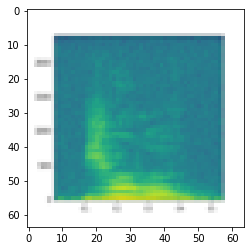

In [11]:
plt.imshow(train_data_1[0])

In [12]:
train_data_1 = train_data_1.astype("float32") / 255.0
test_data_1 = test_data_1.astype("float32") / 255.0
train_data_2 = train_data_2.astype("float32") / 255.0
test_data_2 = test_data_2.astype("float32") / 255.0

In [13]:
def tf_unif_prior_crossentropy(pred1,pred2):
    N, C = pred1.shape 
    t_c = 0.1
    t_r = 0.1
    a = tf.nn.softmax(pred2/t_c, axis=0)
    b = tf.linalg.norm(a, ord=1,axis=1)
    # try :
    c = a/tf.reshape(b,(N,-1))
    # except :
    #     try :
    #         c = a/tf.reshape(b,(X_train.shape[0]%batch_size,-1))
    #     except :
    #         c = a/tf.reshape(b,(X_test.shape[0]%batch_size,-1))
            

    part11 = c
    d = tf.nn.softmax(pred1/t_r, axis=1)
    part21 = tf.reshape(tf.math.log(N/C *d/tf.linalg.norm(d, ord=1, axis=0)), (-1,C))
    loss_1 = -tf.math.reduce_sum( part11 * part21 , axis=-1)


    a = tf.nn.softmax(pred1/t_c)
    b = tf.linalg.norm(a, ord=1,axis=1)
    c = a/tf.reshape(b,(N,-1))
    part12 = c
    d = tf.nn.softmax(pred2/t_r, axis=1)
    part22 = tf.reshape(tf.math.log(N/C *d/tf.linalg.norm(d, ord=1, axis=0)),(-1,C))
    loss_2 = -tf.math.reduce_sum( part12*part22 , axis=-1)

    return tf.math.reduce_mean(1/2*(loss_1+loss_2))

In [31]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3), dtype=tf.float32),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax', dtype='float32'),
    ])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 flatten_8 (Flatten)         (None, 30752)             0         
                                                                 
 dense_16 (Dense)            (None, 32)                984096    
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                      

In [33]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

NUM_EPOCHS = 20
EPOCH_PER_DISPLAY = 1
total_loss = []
train_dataset = tf.data.Dataset.from_tensor_slices((train_data_1, train_data_2))
train_dataset = train_dataset.shuffle(2 * train_data_1.shape[0]).batch(200)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_1, test_data_2))
test_dataset = test_dataset.shuffle(2 * test_data_1.shape[0]).batch(10)

for epoch in range(NUM_EPOCHS):

  running_loss = []

  for input1, input2 in tqdm(train_dataset):
    with tf.GradientTape() as tape:

      pred1 = model(input1, training=True)
      pred2 = model(input2, training=True)

      loss_ = tf_unif_prior_crossentropy(pred1, pred2)

      grads = tape.gradient(loss_, model.trainable_variables)
      
    running_loss.append(loss_)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
  
  epoch_loss = np.mean(running_loss)
  if (epoch + 1) % EPOCH_PER_DISPLAY == 0:
    print("Epoch {}: Train Loss: {:.4f}".format(epoch+1, epoch_loss), end="")


  valid_loss = []
  valid_nmi = []
  valid_ami = []
  valid_ari = []
  valid_acc = []

  for input1, input2 in test_dataset:
    pred1 = model(input1, training=False)
    pred2 = model(input2, training=False)
    loss_ = tf_unif_prior_crossentropy(pred1, pred2)
    valid_loss.append(loss_)
    pred1 = pred1.numpy().argmax(axis=1)
    pred2 = pred2.numpy().argmax(axis=1)
    valid_nmi.append(skl.metrics.normalized_mutual_info_score(pred1, pred2))
    valid_ami.append(skl.metrics.adjusted_mutual_info_score(pred1, pred2))
    valid_ari.append(skl.metrics.adjusted_rand_score(pred1, pred2))
    valid_acc.append(skl.metrics.accuracy_score(pred1, pred2))
    cor_cnt = 0
    for tmp1, tmp2 in zip(pred1, pred2):
      if (tmp1 == tmp2):
        cor_cnt += 1
  print("   Valid Loss: {:.4f}    NMI: {:.4f}   AMI: {:.4f}   ARI: {:.4f}   ACC: {:.4f}".format(np.mean(valid_loss), 
                                                                                np.mean(valid_nmi), np.mean(valid_ami), 
                                                                                np.mean(valid_ari), np.mean(valid_acc), cor_cnt))

100%|██████████| 18/18 [00:01<00:00, 14.53it/s]


Epoch 1: Train Loss: 2.3031   Valid Loss: 2.3026    NMI: 1.0000   AMI: 1.0000   ARI: 1.0000   ACC: 1.0000


100%|██████████| 18/18 [00:01<00:00, 14.24it/s]


Epoch 2: Train Loss: 2.3030   Valid Loss: 2.3026    NMI: 1.0000   AMI: 1.0000   ARI: 1.0000   ACC: 1.0000


100%|██████████| 18/18 [00:01<00:00, 14.23it/s]


KeyboardInterrupt: ignored

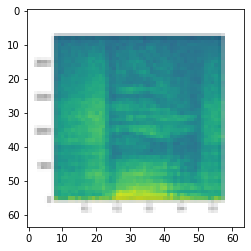

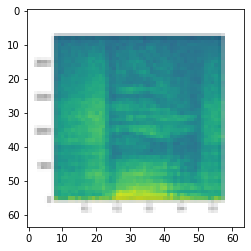

(10, 10)
(10,)
[9 9 9 9 9 9 8 8 9 8]
---
[9 9 9 9 9 9 8 8 9 8]
---
1.0
1.0
1.0


In [69]:
for input1, input2 in test_dataset:
    plt.imshow(input1[3].numpy().reshape(64, 64, 3))
    plt.show()

    plt.imshow(input2[3].numpy().reshape(64, 64, 3))
    plt.show()
    pred1 = model(input1, training=False)
    pred2 = model(input2, training=False)
    print(pred1.shape)
    # loss_ = tf_unif_prior_crossentropy(pred1, pred2)
    # valid_loss.append(loss_)
    pred1 = pred1.numpy().argmax(axis=1)
    pred2 = pred2.numpy().argmax(axis=1)
    print(pred1.shape)
    # print(Y_test.shape)
    print(pred1[:30])
    print("---")
    print(pred2[:30])
    print("---")
    # print(str(true_label[:30]))
    # print(skl.metrics.normalized_mutual_info_score(true_label, pred1))
    # print(skl.metrics.normalized_mutual_info_score(true_label, pred2))
    print(skl.metrics.normalized_mutual_info_score(pred1, pred2))
    print(skl.metrics.adjusted_mutual_info_score(pred1, pred2))
    print(skl.metrics.adjusted_rand_score(pred1, pred2))
    # print(skl.metrics.accuracy_score(true_label, pred1))
    # print(skl.metrics.accuracy_score(true_label, pred2))
    cor_cnt = 0
    for tmp1, tmp2 in zip(pred1, pred2):
      if (tmp1 == tmp2):
        cor_cnt += 1
    break